#DIGITAL FORENSICS PROJECT
##Project 4: NETWORK ANOMALY DETECTION

AUTHORS: 
* Alexander Bonora
* Matteo Pomari <br>



In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
from PIL import Image
import numpy as np
import os
from matplotlib import pyplot as plt
import random as rnd
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
import cv2
import gc
import sklearn.metrics as skm
import seaborn as sb

In [3]:
!gdown --id 1FLmd5dbU-clkTZBYvhpUi81e6dPC0VeS

/usr/local/lib/python3.7/dist-packages/gdown/cli.py:131: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  category=FutureWarning,
Downloading...
From: https://drive.google.com/uc?id=1FLmd5dbU-clkTZBYvhpUi81e6dPC0VeS
To: /content/train.npz
100% 35.2M/35.2M [00:00<00:00, 171MB/s]


In [4]:
!unzip train.npz

Archive:  train.npz
  inflating: arr_0.npy               


In [5]:
old_file_name = 'arr_0.npy'
new_file_name = 'X_train.npy'
os.rename(old_file_name, new_file_name)
trainnpzfile = np.load('X_train.npy', mmap_mode = 'r')

# Dataset pre-processing
Here we chose we take a percentage of all given dataset, we save and resize them. We create:


1.   Train_set
2.   Test_set
3.   Confirmation test_set




### TRAIN\_SET


In [6]:
TEST_COVERAGE = 0.01

number_of_train = int(len(trainnpzfile) * TEST_COVERAGE)
X_train = np.zeros((number_of_train, 256, 256, 1))

keys = rnd.sample(range(0, len(trainnpzfile)), number_of_train)

k = 0

for index in keys:
  X_train[k] = np.resize(trainnpzfile[index],(256,256,1))
  k += 1

print('Number of samples used for training: ', number_of_train)

Number of samples used for training:  4354


In [7]:
np.save('X_train.npy', X_train)

In [8]:
!rm train.npz

In [9]:
del X_train
del keys
del trainnpzfile

gc.collect

<function gc.collect(generation=2)>

In [10]:
!gdown --id 1JPtOCDWyDw5H_MfHYoAzcDGJSXfukMyR

/usr/local/lib/python3.7/dist-packages/gdown/cli.py:131: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  category=FutureWarning,
Downloading...
From: https://drive.google.com/uc?id=1JPtOCDWyDw5H_MfHYoAzcDGJSXfukMyR
To: /content/test.npz
100% 1.26M/1.26M [00:00<00:00, 136MB/s]


In [11]:
!unzip test.npz

Archive:  test.npz
  inflating: arr_0.npy               


In [12]:
old_file_name = 'arr_0.npy'
new_file_name = 'X_test.npy'
os.rename(old_file_name, new_file_name)

In [13]:
testnpzfile = np.load('X_test.npy', mmap_mode = 'r')

### TEST\_SET and VALIDATION\_SET

In [14]:
TEST_SAMPLES_USED = 0.4

test_used = int(len(testnpzfile) * TEST_SAMPLES_USED)

number_of_test = int(test_used/2)
number_of_val = test_used - number_of_test

X_test = np.zeros((number_of_test, 256, 256, 1))
Val_set = np.zeros((number_of_val, 256, 256, 1))

keys = rnd.sample(range(0, len(testnpzfile)), test_used)

keys_1 = keys[:len(keys)//2]
keys_2 = keys[len(keys)//2:]

k = 0

for index in keys_1:
  X_test[k] = np.resize(testnpzfile[index],(256,256,1))
  k += 1

k = 0

for index in keys_2:
  Val_set[k] = np.resize(testnpzfile[index],(256,256,1))
  k += 1

print('Extracted samples: ', test_used)
print('Test sample size: ', k)
print('Test sample size for result confirmation: ', k)

Extracted samples:  6022
Test sample size:  3011
Test sample size for result confirmation:  3011


In [15]:
np.save('X_test.npy', X_test)
np.save('Val_set.npy', Val_set)

In [16]:
!rm test.npz

In [17]:
del testnpzfile
del X_test
del Val_set

gc.collect

<function gc.collect(generation=2)>

##LABEL DATASET
Here we create 2 lists containing the labels of our data.

In [18]:
!gdown 1FpQQc1qJxvavcr5mz84dHDokTtWJG4IE

Downloading...
From: https://drive.google.com/uc?id=1FpQQc1qJxvavcr5mz84dHDokTtWJG4IE
To: /content/test.csv
100% 558k/558k [00:00<00:00, 103MB/s]


In [20]:
import csv

data = csv.reader(open('test.csv'))
next(data)

column_label = []

for row in data:
    column_label.append(row[1])

column_label_1 = column_label[:len(column_label)//2]
column_label_2 = column_label[len(column_label)//2:]

Y_test = []
Val_set_label = []

for index in keys_1:
  Y_test.append(column_label[index])

for index in keys_2:
  Val_set_label.append(column_label[index])

print('Test sample label size: ', len(keys_1))
print('Test sample label size for result confirmation: ', len(keys_2))

Test sample label size:  3011
Test sample label size for result confirmation:  3011


In [21]:
np.save('Y_test.npy', Y_test)
np.save('Val_set_label.npy', Val_set_label)

In [22]:
!rm test.csv

In [23]:
del Y_test
del Val_set_label
del data
del keys

gc.collect

<function gc.collect(generation=2)>

In [24]:
Y_test = np.load('Y_test.npy', mmap_mode = 'r')

In [25]:
del Y_test

gc.collect

<function gc.collect(generation=2)>

In [26]:
Val_set_label = np.load('Val_set_label.npy', mmap_mode = 'r')

In [27]:
del Val_set_label

gc.collect

<function gc.collect(generation=2)>

#LOSS FUNCTION

Now we define the **LOSS FUNCTION**. This will be useful in the autoencoder train phase. 
The idea is to prioritize the white pixels, since they are the ones that contain the discriminating information for a clean sample versus an anomaly sample.

Note that we used the optimized tensorflow libraries to improve performance and that we define 2 Loss:

1.   custom_loss_function()
2.   loss_function()

in order to adapt the logic both for the train phase and for manage the individual matrix.


In [28]:
def custom_loss_function(y_true, y_pred):
  loss_sqr = tf.square(y_true - y_pred)
  condition = tf.greater(y_true, 0)
  mask = tf.boolean_mask(loss_sqr, condition)
  return tf.reduce_mean(mask)

In [29]:
def loss_function(y_true, y_pred):
  loss_vector = []

  for a,b in zip(y_true, y_pred):
    loss_sqr = tf.square(a - b)
    condition = tf.greater(a, 0)
    mask = tf.boolean_mask(loss_sqr, condition)
    loss_vector.append(tf.reduce_mean(mask))
  return loss_vector

In [30]:
X_train = np.load('X_train.npy', mmap_mode = 'r')

#AUTOENCODER
**Build the model**

In [31]:
encoder_input = keras.Input(shape=(256, 256, 1))
x = layers.Conv2D(16, (3, 3), activation='relu', padding='same')(encoder_input)

x = layers.MaxPooling2D((2, 2), padding='same')(x)

x = layers.Conv2D(8, (3, 3), activation='relu', padding='same')(x)

x = layers.MaxPooling2D((2, 2), padding='same')(x)

x = layers.Flatten()(x)

encoder_output = layers.Dense(32, activation='relu')(x)

decoder_input = layers.Dense(32768, activation='relu')(encoder_output)

x = layers.Reshape((64, 64, 8))(decoder_input)

x = layers.UpSampling2D((2, 2))(x)

x = layers.Conv2DTranspose(16, kernel_size=3, activation='relu', padding='same')(x)

x = layers.UpSampling2D((2, 2))(x)

decoder_output= layers.Conv2DTranspose(1, kernel_size=3, activation='relu', padding='same')(x)

autoencoder = keras.Model(encoder_input, decoder_output, name = 'autoencoder')
optimizer = keras.optimizers.Adam()

autoencoder.summary()

Model: "autoencoder"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 256, 256, 1)]     0         
                                                                 
 conv2d (Conv2D)             (None, 256, 256, 16)      160       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 128, 128, 16)     0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 128, 128, 8)       1160      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 64, 64, 8)        0         
 2D)                                                             
                                                                 
 flatten (Flatten)           (None, 32768)             

#COMPILE \& FIT PHASE
Here we use the already defined train_loss implementing a callbacks.

Note that the autoencoder is trained using only the clean samples.

In [32]:
callback = tf.keras.callbacks.EarlyStopping(monitor='loss', patience=3)
autoencoder.compile(optimizer, loss = custom_loss_function)
autoencoder.fit(X_train, X_train, epochs = 8, batch_size = 16, callbacks=[callback])

Epoch 1/8
273/273 [==============================] - 281s 1s/step - loss: 7089.3809
Epoch 2/8
273/273 [==============================] - 279s 1s/step - loss: 3190.2549
Epoch 3/8
273/273 [==============================] - 277s 1s/step - loss: 2635.1943
Epoch 4/8
273/273 [==============================] - 282s 1s/step - loss: 2263.1675
Epoch 5/8
273/273 [==============================] - 279s 1s/step - loss: 1991.8473
Epoch 6/8
273/273 [==============================] - 286s 1s/step - loss: 1727.4235
Epoch 7/8
273/273 [==============================] - 282s 1s/step - loss: 1571.8253
Epoch 8/8
273/273 [==============================] - 284s 1s/step - loss: 1412.7379


**PREDICT THE MODEL OVER X_TRAIN**

In [33]:
ae_out = autoencoder.predict(X_train)
np.save('ae_out_train.npy', ae_out)

In [34]:
del ae_out

gc.collect

<function gc.collect(generation=2)>

In [35]:
ae_out = np.load('ae_out_train.npy', mmap_mode = 'r')

#COMPUTE THE TRAIN DATASET LOSS

Here we calcolate the loss_function on the train dataset.


In [36]:
mse_train = loss_function(X_train, ae_out)

In [37]:
np.save('mse_train.npy', mse_train)

In [38]:
del mse_train
del ae_out
del X_train

gc.collect

<function gc.collect(generation=2)>

In [39]:
X_test = np.load('X_test.npy', mmap_mode = 'r')

**PREDICT THE MODEL OVER X_TEST**

In [40]:
ae_out = autoencoder.predict(X_test)
np.save('ae_out_test.npy', ae_out)

In [41]:
del ae_out

gc.collect

<function gc.collect(generation=2)>

In [42]:
ae_out = np.load('ae_out_test.npy', mmap_mode = 'r')

#COMPUTE THE TEST DATASET LOSS

Here we calcolate the loss_function on the test dataset.

In [43]:
mse_test = loss_function(X_test, ae_out)

In [44]:
np.save('mse_test.npy', mse_test)

In [45]:
del mse_test
del X_test

gc.collect

<function gc.collect(generation=2)>

In [46]:
Val_set = np.load('Val_set.npy', mmap_mode = 'r')
Y_test = np.load('Y_test.npy', mmap_mode = 'r')

**PREDICT THE MODEL OVER VAL_SET**

In [47]:
ae_out = autoencoder.predict(Val_set)
np.save('ae_out_valid.npy', ae_out)

#COMPUTE THE VALIDATION DATASET LOSS

Here we calcolate the loss_function on the test dataset.

In [48]:
mse_val = loss_function(Val_set, ae_out)
np.save('mse_val.npy', mse_val)

In [49]:
del Y_test
del Val_set
del mse_val

gc.collect

<function gc.collect(generation=2)>

In [50]:
mse_train = np.load('mse_train.npy')

#Threshold

Here we calculate the Threshold: which determines whether an image is to be considered clean or anomaly, by using the computed losses.

The idea of the algorithm is to make a loop that gradually increases the threshold and at each step saves how many samples were categorized correctly.

The starting value is the mean of mse_train calculated as percentage of the max mse_train value, which can reach the maximum value considered as 100% contained in mse_train. We evaluate the performance of the classification by increasing by 5% at each loop.

This threshold is set to have a good performance for having low FALSE CLEAN.

There is a commented part which sets a good threshold in order to have low FALSE ANOMALY.

Priority was given in lowering the amount of anomalies falling through while still performing well for the clean not making it through.

In [51]:
MEAN = np.mean(mse_train)
MAX = np.max(mse_train)
STEP = 5
START = int(((MEAN/MAX)*100)/STEP)*STEP #want to round to a 5%

thresholds = []
percentage = []

for c in range(START, 101, STEP):
  true_clean = 0
  false_anomaly = 0
  threshold = (c/100)*MAX
  for i in mse_train: 
    if i <= threshold:
      true_clean += 1
    else:
      false_anomaly += 1
  percentage.append(true_clean)
  thresholds.append(threshold)


percentage_array = np.array(percentage)
difference_percentage_array = np.diff(percentage_array)
difference_percentage = difference_percentage_array.tolist()

#### BEST FIT FOR CLEAN
'''
for i in range(len(difference_percentage)):
  if difference_percentage[i] > 5:
    index = i
threshold = thresholds[index + 1]
'''

###BEST GENERAL FIT

print('Maximum anomalies taken improvement: ', max(difference_percentage))
max_index = difference_percentage.index(max(difference_percentage))
threshold = thresholds[max_index + 1]  

print('Anomalies taken improvement: ', difference_percentage)
print('Threshold value: ', threshold)

clean = 0
anomaly = 0

for mse in mse_train: 
  if mse <= threshold:
    clean += 1
  else:
    anomaly += 1

print('Number of clean in training set: ', clean)
print('Number of anomaly in training set: ', anomaly)
print('Accuracy percentage in training set: ', clean / (clean + anomaly))

Maximum anomalies taken improvement:  941
Anomalies taken improvement:  [941, 431, 219, 115, 60, 34, 8, 9, 5, 2, 3, 1, 1, 3, 3, 0, 0, 0, 2]
Threshold value:  1952.7848558785627
Number of clean in training set:  3458
Number of anomaly in training set:  896
Accuracy percentage in training set:  0.7942122186495176


In [52]:
mse_test = np.load('mse_test.npy', mmap_mode = 'r')

In [53]:
Y_test = np.load('Y_test.npy', mmap_mode = 'r')

#CONFUSION MATRIX

Here we can visualize how our autoencoder categorizes the images using the threshold computed above for 3 dataset:


1.   Test set
2.   Confirmation test set



In [54]:
true_Y_label = []
calc_Y_label = []

true_Y_label = [int(label != 'clean') for label in Y_test]
calc_Y_label = [int(mse >= threshold) for mse in mse_test]

In [55]:
confusion_Test = skm.confusion_matrix(calc_Y_label, true_Y_label)

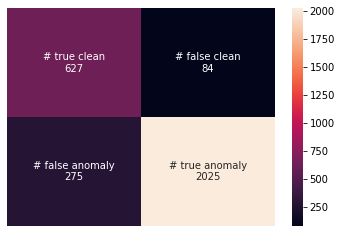

In [56]:
text = np.asarray([['# true clean', '# false clean'], ['# false anomaly', '# true anomaly']])
labels = (np.asarray(["{0}\n{1:.0f}".format(text,confusion_Test) for text, confusion_Test in zip(text.flatten(), confusion_Test.flatten())])).reshape(2,2)

heat_map = sb.heatmap(confusion_Test, xticklabels=False, yticklabels=False, annot=labels, fmt='')

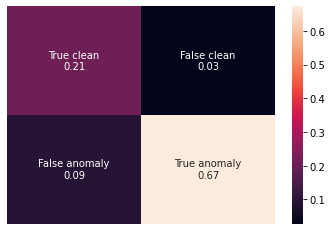

In [57]:
norm_confusion_Test = confusion_Test/len(true_Y_label)

text = np.asarray([['True clean', 'False clean'], ['False anomaly', 'True anomaly']])
labels = (np.asarray(["{0}\n{1:.2f}".format(text,norm_confusion_Test) for text, norm_confusion_Test in zip(text.flatten(), norm_confusion_Test.flatten())])).reshape(2,2)

heat_map = sb.heatmap(confusion_Test/len(true_Y_label), xticklabels=False, yticklabels=False, annot=labels, fmt='')

In [58]:
mse_val = np.load('mse_val.npy', mmap_mode = 'r')

In [59]:
Val_set_label = np.load('Val_set_label.npy', mmap_mode = 'r')

In [60]:
true_Y_label = []
calc_Y_label = []

true_Y_label = [int(label != 'clean') for label in Val_set_label]
calc_Y_label = [int(mse >= threshold) for mse in mse_val]

In [61]:
confusion_Test = skm.confusion_matrix(calc_Y_label, true_Y_label)

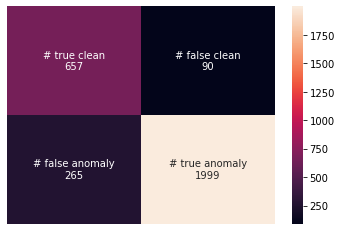

In [62]:
text = np.asarray([['# true clean', '# false clean'], ['# false anomaly', '# true anomaly']])
labels = (np.asarray(["{0}\n{1:.0f}".format(text,confusion_Test) for text, confusion_Test in zip(text.flatten(), confusion_Test.flatten())])).reshape(2,2)

heat_map = sb.heatmap(confusion_Test, xticklabels=False, yticklabels=False, annot=labels, fmt='')

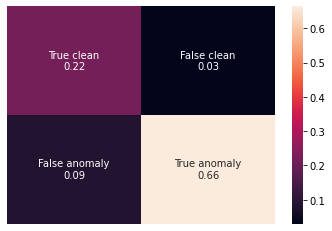

In [63]:
norm_confusion_Test = confusion_Test/len(true_Y_label)

text = np.asarray([['True clean', 'False clean'], ['False anomaly', 'True anomaly']])
labels = (np.asarray(["{0}\n{1:.2f}".format(text,norm_confusion_Test) for text, norm_confusion_Test in zip(text.flatten(), norm_confusion_Test.flatten())])).reshape(2,2)

heat_map = sb.heatmap(confusion_Test/len(true_Y_label), xticklabels=False, yticklabels=False, annot=labels, fmt='')

#CLUSTERING

Now that we have defined a threshold for distinguishing clean samples from anomalous ones, let's try to evaluate the various types of attacks and to categorize them.

In [64]:
from sklearn.cluster import KMeans
from sklearn.metrics.cluster import adjusted_rand_score

##BUILD THE MODEL

Here we build the encoder.

In [65]:
encoder = keras.Model(encoder_input, encoder_output, name = 'encoder')
optimizer = keras.optimizers.Adam()

encoder.summary()

Model: "encoder"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 256, 256, 1)]     0         
                                                                 
 conv2d (Conv2D)             (None, 256, 256, 16)      160       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 128, 128, 16)     0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 128, 128, 8)       1160      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 64, 64, 8)        0         
 2D)                                                             
                                                                 
 flatten (Flatten)           (None, 32768)             0   

###Here we count how many sample we have for each category in the Y_test

In [66]:
X_test = np.load('X_test.npy', mmap_mode = 'r')
Y_test = np.load('Y_test.npy', mmap_mode = 'r')

label_to_number = []

for label in Y_test: 
  if label == 'clean':
    label_to_number.append(0)
  if label == 'dos11':
    label_to_number.append(1)
  if label == 'dos53':
    label_to_number.append(2)
  if label == 'scan11':
    label_to_number.append(3)
  if label == 'scan44':
    label_to_number.append(4)

**PREDICT THE MODEL OVER X_TEST**

In [67]:
e_out = encoder.predict(X_test)

#KMEANS

The k-means algorithm searches for a pre-determined number of clusters within an unlabeled dataset. In our case we have 5 cluster.

In [68]:
k = 5
clusters = KMeans(k, random_state = 2)
clusters.fit(e_out)

KMeans(n_clusters=5, random_state=2)

In [69]:
labels_output = clusters.labels_

The functuin here computes a similarity measure between two clusterings by considering all pairs of samples and counting pairs that are assigned in the same or different clusters in the predicted and true clusterings.

In [70]:
print('K-Means performance in detecting and fitting correct labels: ', adjusted_rand_score(label_to_number, labels_output))

K-Means performance in detecting and fitting correct labels:  0.0865613569929289
